In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 4\11-Apr-2023 Instacart Basket Analysis'

In [3]:
# Importing Final Data Sets
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_Order_Product_Customer_Dataset.pkl'))
df_dep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_department.pkl'))

In [4]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,income,region,activity_flag,age_group,income_group,household_size,department,time_of_order,time_of_week,prices_mod
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,49620,Midwest,high activity,Senior,Low,Medium Family,snacks,Day,Weekdays,5.8
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,49620,Midwest,high activity,Senior,Low,Medium Family,snacks,Evening,Weekdays,5.8
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,49620,Midwest,high activity,Senior,Low,Medium Family,meat seafood,Day,Weekdays,20.0
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,49620,Midwest,high activity,Senior,Low,Medium Family,meat seafood,Day,Weekdays,20.0
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,49620,Midwest,high activity,Senior,Low,Medium Family,bulk,Day,Weekdays,12.9


In [5]:
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# Create a data dictionary for departments
data_dict = df_dep.set_index('department_id')['department'].to_dict()

In [7]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [8]:
# Checking the values of department_id
df['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [9]:
# Creating a new column to convert department_id
df['department'] = df['department_id'].map(data_dict)

In [10]:
# Checking the values of department
df['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404847
Data columns (total 39 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   order_number            int64  
 8   orders_day_of_week      int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  add_to_cart_order       int64  
 12  reordered               int64  
 13  price_range_loc         object 
 14  busiest day             object 
 15  busiest days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  avg_price               float64
 20  spending_flag           object 
 21  median_freq             float

In [12]:
df.order_freq_flag

0           Frequent customer
1           Frequent customer
2           Frequent customer
3           Frequent customer
4           Frequent customer
                  ...        
32404843     Regular customer
32404844     Regular customer
32404845     Regular customer
32404846     Regular customer
32404847     Regular customer
Name: order_freq_flag, Length: 30964564, dtype: object

In [13]:
mapping = {'Regular customer': 'Normal Orders', 'Frequent customer': 'Frequent Orders', 'Non-frequent customer': 'Non-frequent Orders'}

In [14]:
df['order_freq_flag'] = df['order_freq_flag'].replace(mapping)

In [15]:
df.order_freq_flag

0           Frequent Orders
1           Frequent Orders
2           Frequent Orders
3           Frequent Orders
4           Frequent Orders
                 ...       
32404843      Normal Orders
32404844      Normal Orders
32404845      Normal Orders
32404846      Normal Orders
32404847      Normal Orders
Name: order_freq_flag, Length: 30964564, dtype: object

In [16]:
crosstab_users = pd.crosstab(index=df['loyalty_flag'], columns=df['order_freq_flag'], values=df['user_id'], aggfunc=pd.Series.nunique, dropna=False)

In [17]:
crosstab_users

order_freq_flag,Frequent Orders,Non-frequent Orders,Normal Orders
loyalty_flag,,,
Loyal customer,17008.0,NaN,9.0
New customer,18184.0,29625.0,20941.0
Regular customer,40735.0,7040.0,29089.0


Text(0.5, 0, 'Type of Customer')

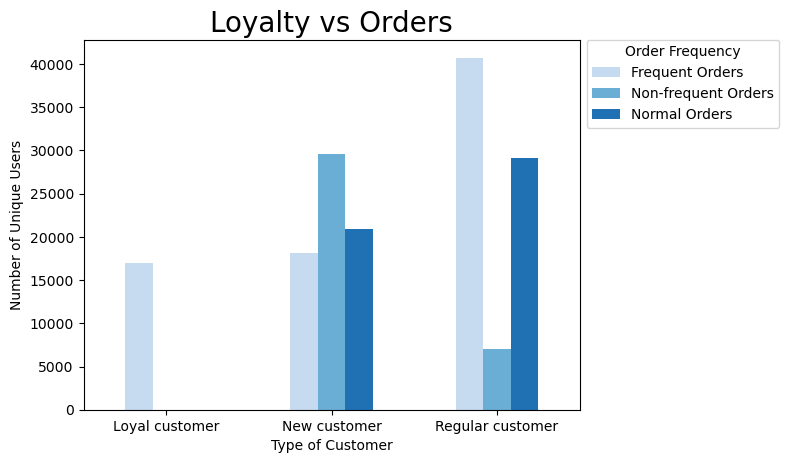

In [18]:
# Creating a bar chart for customer loyalty and order
bar_loyal_Freq = crosstab_users.plot(kind = 'bar', rot = 0, color = sns.color_palette('Blues', 3))
bar_loyal_Freq.legend(title = 'Order Frequency', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Loyalty vs Orders', fontsize = 20)
plt.ylabel('Number of Unique Users')
plt.xlabel('Type of Customer')

In [19]:
# Compare age groups across departments
crosstab_age_dep = pd.crosstab(df['department'], df['age_group'], dropna = False)

In [20]:
crosstab_age_dep

age_group,Middle Aged,Senior,Young Adult
department,,,
alcohol,56278,36693,51656
babies,162732,106204,141456
bakery,438829,295997,386002
beverages,1013708,684020,874173
breakfast,263615,175296,231939
bulk,12882,8945,11624
canned goods,394849,267509,349716
dairy eggs,2015807,1368072,1793303
deli,392790,265199,345845


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

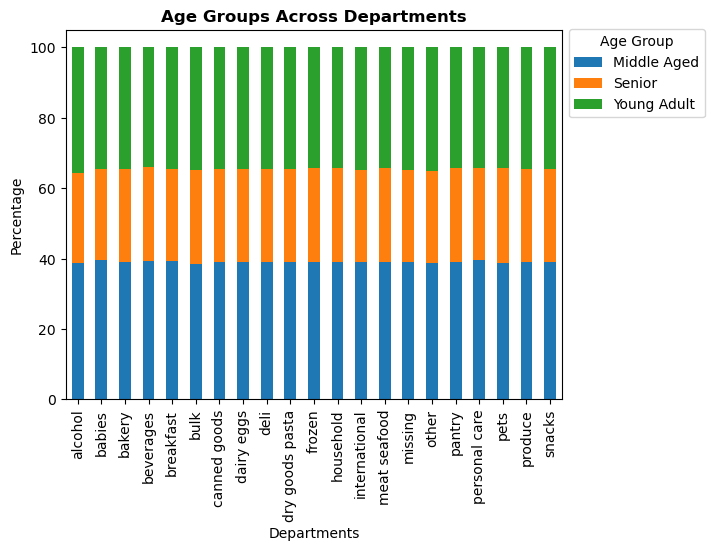

In [21]:
# Create a stacked bar chart for age_group and department
crosstab_age_dep_percent = crosstab_age_dep.apply(lambda x: x/x.sum()*100, axis=1)
bar_age_department = crosstab_age_dep_percent.plot(kind='bar', stacked=True, rot=0)
plt.title('Age Groups Across Departments', fontweight='bold')
plt.ylabel('Percentage')
plt.xlabel('Departments')
bar_age_department.legend(title='Age Group', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xticks(rotation=90)

In [22]:
# Compare income groups across departments
crosstab_income_dep = pd.crosstab(df['department'], df['income_group'], dropna = False)

In [23]:
crosstab_income_dep

income_group,High,Low,Middle
department,,,
alcohol,18471,19346,106810
babies,37021,34026,339345
bakery,106473,118157,896198
beverages,222318,413096,1936487
breakfast,57630,99160,514060
bulk,2403,5060,25988
canned goods,93729,88560,829785
dairy eggs,462999,555091,4159092
deli,88793,116835,798206


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

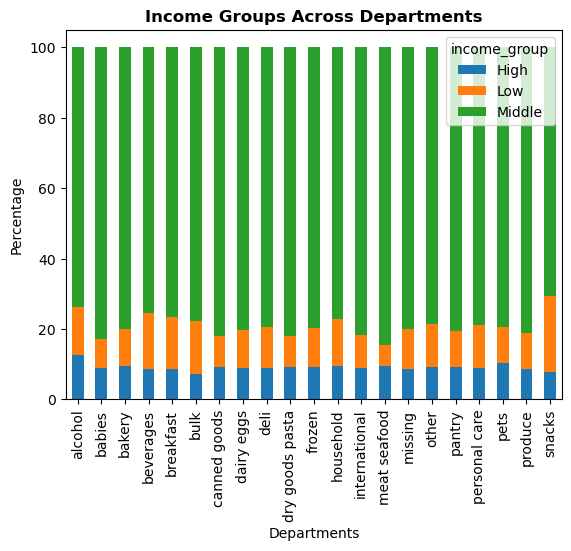

In [24]:
# Create a stacked bar chart for Income_group and Department
crosstab_income_dep_percent = crosstab_income_dep.apply(lambda x: x/x.sum()*100, axis=1)
bar_income_department = crosstab_income_dep_percent.plot(kind='bar', stacked=True, rot=0)
plt.title('Income Groups Across Departments', fontweight='bold')
plt.ylabel('Percentage')
plt.xlabel('Departments')
bar_age_department.legend(title='Income Group', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xticks(rotation=90)

In [25]:
# Compare family size across departments
crosstab_family_dep = pd.crosstab(df['department'], df['household_size'], dropna = False)

In [26]:
crosstab_family_dep

household_size,Large Family,Medium Family,Single
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

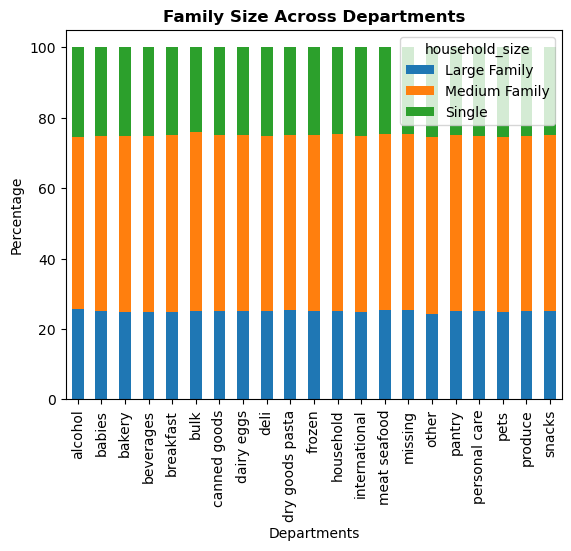

In [27]:
# Create a stacked bar chart for Household_Size and Department
crosstab_family_dep_percent = crosstab_family_dep.apply(lambda x: x/x.sum()*100, axis=1)
bar_family_department = crosstab_family_dep_percent.plot(kind='bar', stacked=True, rot=0)
plt.title('Family Size Across Departments', fontweight='bold')
plt.ylabel('Percentage')
plt.xlabel('Departments')
bar_age_department.legend(title='Family Size', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xticks(rotation=90)

In [28]:
# Finding total price spent based on hour of day
busiest_hours_price = df.groupby('order_hour_of_day').agg({'prices_mod' : ['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices_mod', 'sum'), ascending=False)
busiest_hours_price

,prices_mod
,sum
order_hour_of_day,
10,20532810.3
11,20320495.0
14,20037882.1
15,19796343.3
13,19790153.2
12,19444460.1
16,18834059.6
9,18324411.7


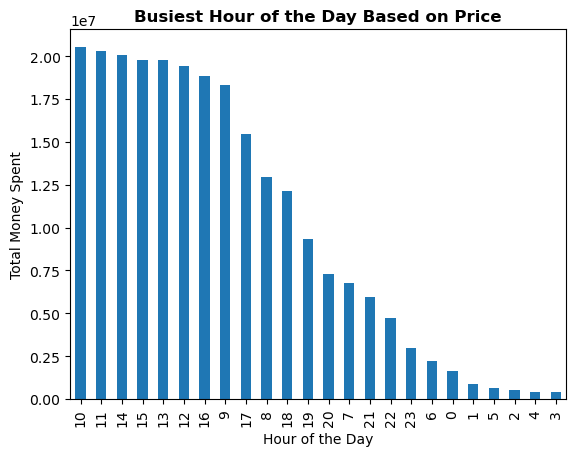

In [29]:
# Creating bar chart for busiest hour of the day based on price
busiest_hours_price_bar = busiest_hours_price.plot.bar(legend = None)
plt.title('Busiest Hour of the Day Based on Price', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Money Spent')
plt.show()